# Welcome to Split 3

You have learnt too much about coding in Split 2 and here comes your time to see how far you have learnt.


You also learnt a cool amount of Statisitcs Let's Start building together a **Simple Linear Regression** Model From Scratch.

# FOLLOW THESE STEPS

**First** : Let me Put You on the Road.

If you are using Google Colab please Execute the following Code in next Cell  , so you will give the Permission for Google Colab to Access your folders in Google Drive

***DO NOT RUN IT IF YOU ARE ON JUPYTER ***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Second**  Let's Install Our Dependencies
`xlrd` is used for  Reading Excel Files


In [ ]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Third** : Let's Now Import the Packages that we are going to use

In [ ]:
import numpy as np   # For Matrices Manipulations
import pandas as pd  # For Data frames etc
import xlrd  # For Excel Files
import os   # For Changing to the Correct Directory

In [ ]:
os.chdir('/content/drive/MyDrive/E2Edata')  # Try to fix this to  the Correct path So you can find The file

In [ ]:
!ls       #  its an Order to List all files in the Current Directory You are in

 data.xlsx  'data.xlsx - Sheet1.csv'


**Forth** :  Type a Code to Read  The Excel File
hint go and use `pd.read_excel`

In [ ]:
df= pd.read_excel("/content/drive/MyDrive/E2Edata/data.xlsx")
df

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


So this Data is about:-

Auto Insurance in Sweden
In the following data

X = number of claims

Y = total payment for all the claims in thousands of Swedish Kronor

for geographical zones in Sweden
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance



**Fifth** Type a Code  that Change the Features and Labels  from pandas frame into Numpy Arrays.

*40 rows only* for **Training** and the Rest for **Testing**
hint : use `df.iloc` ,`.values`

In [ ]:
X_train= df.iloc[: int(len(df)*.7),0].values
y_train= df.iloc[: int(len(df)*.7),1].values
X_test=  df.iloc[int(len(df)*.7) :,0].values
y_test=  df.iloc[int(len(df)*.7) :,1].values

X_train

array([108,  19,  13, 124,  40,  57,  23,  14,  45,  10,   5,  48,  11,
        23,   7,   2,  24,   6,   3,  23,   6,   9,   9,   3,  29,   7,
         4,  20,   7,   4,   0,  25,   6,   5,  22,  11,  61,  12,   4,
        16,  13,  60,  41,  37])

**Sixth** Check the Type and Size of the Arrays you created by Printing them.
hint Go and use :  `shape` , `type`

In [ ]:
print('The Features to be trained on :', X_train.shape )
print('The Labels to be trained on :',  y_train.shape )
print('The Features to be tested on :',  X_test.shape )
print('The Labels to be tested on :',  y_test.shape )
print('X_train type : ', type(X_train), 'X_test type :',type(X_test) ,'y_train type :', type(y_train), 'y_test type :', type(y_test) )

The Features to be trained on : (44,)
The Labels to be trained on : (44,)
The Features to be tested on : (19,)
The Labels to be tested on : (19,)
X_train type :  <class 'numpy.ndarray'> X_test type : <class 'numpy.ndarray'> y_train type : <class 'numpy.ndarray'> y_test type : <class 'numpy.ndarray'>


**Seventh** Let me do this for you  but watch me properly, its for Visualization.

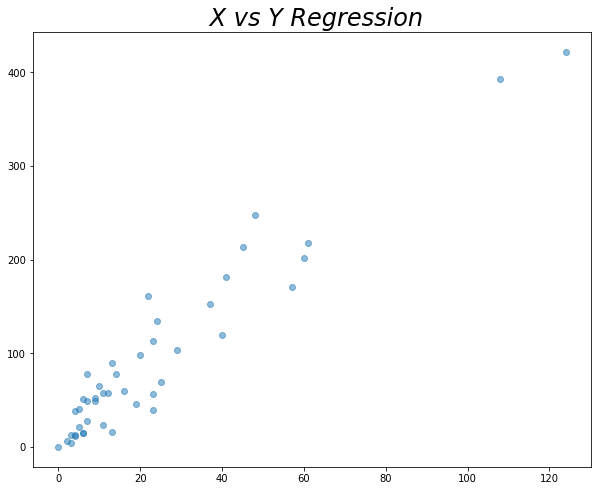

In [ ]:
import matplotlib.pyplot as plt # A Great Package For Plotting and Visualization
plt.figure(figsize=(10,8))     # The Plotting Window Size
plt.title(' X vs Y Regression', fontsize=24 , fontstyle='italic')  # Title , Font size and Style
plt.scatter(X_train ,y_train , alpha =0.5, label='Y')  # NOTE : Make Sure  x_train , y_train  IN Data Type ( Array )
plt.show()   # Showing the Result of plotting

Hungry for Statistics ?
Okey Let's Go for it, But Do you even remember the Expressions?

**Eighth** ? I don't know how to type this  but i meant 8th
Okey, Whatever Just Go and build a Function Mean Squared Error and call it `MSE()` That Takes a List of Actual Values and List of Predicted Values  then Returning the Mean Squared Error between them


In [ ]:
def MSE (actual, predicted):
    mse=np.sum((np.power(np.subtract(actual,predicted),2))) / len(actual)
    return mse

**Ninth** Build  Following Functions:

1- `Mean()`  its input :  Values ,  its Ouput : Mean of the Values.

2- `Variance()` its input : Values, Mean , its Output : Variance of the Values.

3- `Covariance()` its input : Values of X, X_mean , y_mean ,y, its Output : Covariance of X and Y.



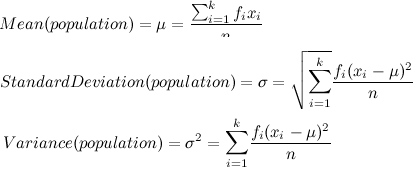

In [ ]:
def Mean (Values):
    m=np.sum(Values)/len(Values)
    return m

def Variance(Values, mean):
    var=np.sum(np.power(np.subtract(Values,mean),2))/len(Values)
    return var

def covariance(X,mx,Y,my):
    Cov=np.sum(np.multiply(np.subtract(X,mx),np.subtract(Y,my)))/len(X)
    return Cov


In [ ]:
mx=Mean(X_train)
my=Mean(y_train)

v_x=Variance(X_train , mx)
cov=covariance(X_train, mx, y_train , my)
v_x
cov


2344.3452479338844

**Tenth** : watch out for a Sensitive Point you now need to build a Function that will use  the Previous Functions to return the Co-efficents of the Best Fit Line  which  is Beta Zero and Beta One

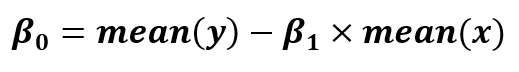


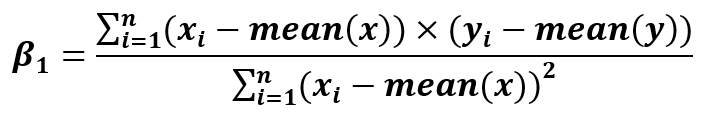

Alternate way for Beta One


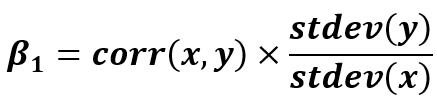

In [ ]:
def coefficents(x_data , y_data ):
  # hint Call Your Previous Functions over Here
  mx=Mean(x_data)
  my=Mean(y_data)
  beta_11=np.sum(np.multiply(np.subtract(x_data,mx),np.subtract(y_data,my)))
  beta_12=np.sum(np.power(np.subtract(x_data,mx),2))
  beta_1=beta_11/beta_12
  beta_0=my - beta_1 * mx
  return beta_0 , beta_1


**Eleventh**: Build a function  that will take the Input Training Data and Testing the Data , Then call the Co efficient Function with the Training Data to get the Co efficents then use it for Building the Best fit Line and return the Predictions of the Test set


In [ ]:
def SimpleLinearRegression(x_train , y_data , x_test):
  b0 , b1 = coefficents(x_train , y_data)
  pred_y= np.multiply(x_test,b1) + b0
  return pred_y

**Twelveth**: Finally Build a Function that Calls The `MSE` function and the `SimpleLineRegression` Function and use it to Print the Result as an Evaluation for the model

In [ ]:
def Evaluate (x_train , y_train, x_test, y_test):
  pre_y=SimpleLinearRegression(x_train , y_train , x_test)
  err=MSE(y_test,pre_y)
  return err

Let me Now visualize your work for you ! Just help me with the Naming

In [ ]:
pre_y=SimpleLinearRegression(X_train,y_train , X_test)
err=Evaluate(X_train,y_train , X_test , y_test)
print(err)

2524.2130745340414


<function matplotlib.pyplot.show(*args, **kw)>

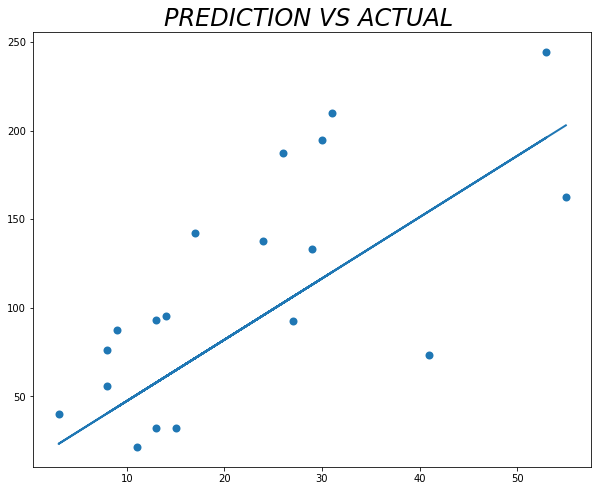

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('PREDICTION VS ACTUAL ', fontsize=24 , fontstyle='italic')
plt.scatter(X_test, y_test, linewidth=2.0)  ## REPLACE X AND Y WITH  X_test AND y_test ARRAYS!
plt.plot(X_test, pre_y, linewidth=2.0)  ## REPLACE X AND Y WITH  X_test AND PREDS ARRAYS!
plt.show

You 've done So *GREAT* today !
# Thank You